# MultiVariate Feature Selection Methods:

# Wrapper Method

https://www.youtube.com/watch?v=zW1SvA0Z-l4&list=PLc2rvfiptPSQYzmDIFuq2PqN2n28ZjxDH&index=11

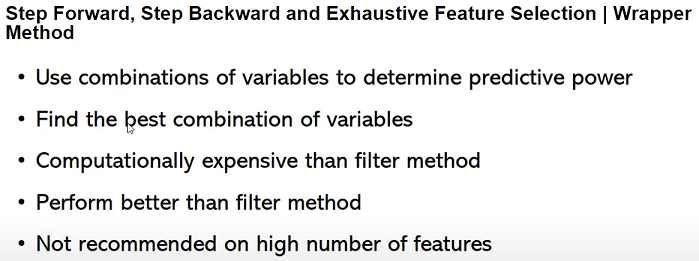

### NOTE: We include machine learning Algorithm while using Wrapper Methods

## Sequential Feature Selection

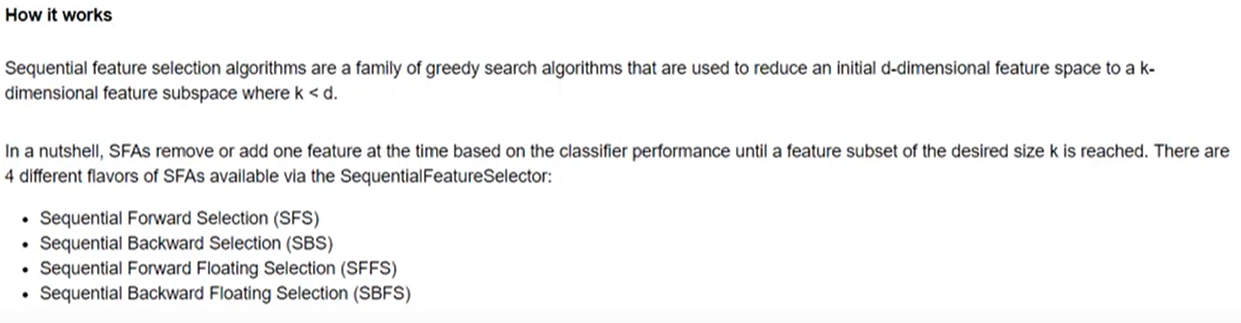

In [41]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

In [42]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import roc_auc_score

In [43]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [44]:
from sklearn.datasets import load_wine

In [45]:
df = pd.read_csv('wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [46]:
df.dtypes

Wine                      int64
Alcohol                 float64
Malic.acid              float64
Ash                     float64
Acl                     float64
Mg                        int64
Phenols                 float64
Flavanoids              float64
Nonflavanoid.phenols    float64
Proanth                 float64
Color.int               float64
Hue                     float64
OD                      float64
Proline                   int64
dtype: object

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Wine                  178 non-null    int64  
 1   Alcohol               178 non-null    float64
 2   Malic.acid            178 non-null    float64
 3   Ash                   178 non-null    float64
 4   Acl                   178 non-null    float64
 5   Mg                    178 non-null    int64  
 6   Phenols               178 non-null    float64
 7   Flavanoids            178 non-null    float64
 8   Nonflavanoid.phenols  178 non-null    float64
 9   Proanth               178 non-null    float64
 10  Color.int             178 non-null    float64
 11  Hue                   178 non-null    float64
 12  OD                    178 non-null    float64
 13  Proline               178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [48]:
df.shape

(178, 14)

In [49]:
df.isnull().sum()

Wine                    0
Alcohol                 0
Malic.acid              0
Ash                     0
Acl                     0
Mg                      0
Phenols                 0
Flavanoids              0
Nonflavanoid.phenols    0
Proanth                 0
Color.int               0
Hue                     0
OD                      0
Proline                 0
dtype: int64

In [50]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

##### As we are using Tree based algorithm, we don't need to standardise the data

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142,), (36,))

### 1. Sequential forward feature Selection

In [88]:
sfs = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1),
         k_features=7, # Number of features to select
         forward=True, 
         floating=False, # Adds a conditional exclusion/inclusion if True.
         verbose=2,
         scoring='accuracy',
         cv=4,
         n_jobs=-1,
         ).fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:    1.0s remaining:    1.7s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    2.0s finished

[2022-09-18 21:40:23] Features: 1/7 -- score: 0.7674603174603174[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    0.9s remaining:    1.9s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    1.7s finished

[2022-09-18 21:40:25] Features: 2/7 -- score: 0.9718253968253968[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  11 | elapsed:    0.9s remaining:    4.3s
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    1.1s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    1.7s finished

[2022-09-18 21:40:27] Features: 3/7 -- score: 0.9859126984126985[Parallel(n_jobs=-1)]: Using backend Lok

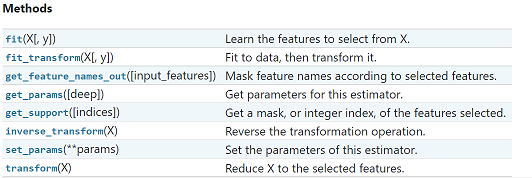

In [89]:
# which 7 features are selected
sfs.k_feature_names_

('Alcohol', 'Ash', 'Mg', 'Flavanoids', 'Proanth', 'Color.int', 'Proline')

In [90]:
# index of the 7 features
sfs.k_feature_idx_

(0, 2, 4, 6, 8, 9, 12)

In [91]:
# maximum score with the features
sfs.k_score_

0.9791666666666666

In [92]:
sfs.get_params()

{'clone_estimator': True,
 'cv': 4,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'sqrt',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': -1,
 'estimator__oob_score': False,
 'estimator__random_state': 0,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(n_jobs=-1, random_state=0),
 'fixed_features': None,
 'floating': False,
 'forward': True,
 'k_features': 7,
 'n_jobs': -1,
 'pre_dispatch': '2*n_jobs',
 'scoring': 'accuracy',
 'verbose': 2,
 'randomforestclassifier': RandomForestClassifier(n_jobs=-1, random_state=0),
 'randomforestclassifier__bootstrap': True,
 'randomfo

In [93]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(6,)","[0.7222222222222222, 0.8333333333333334, 0.742...",0.76746,"(Flavanoids,)",0.06709,0.041853,0.024164
2,"(6, 9)","[0.9444444444444444, 1.0, 0.9714285714285714, ...",0.971825,"(Flavanoids, Color.int)",0.031492,0.019646,0.011343
3,"(4, 6, 9)","[0.9722222222222222, 1.0, 0.9714285714285714, ...",0.985913,"(Mg, Flavanoids, Color.int)",0.022586,0.01409,0.008135
4,"(4, 6, 9, 12)","[0.9722222222222222, 0.9722222222222222, 0.971...",0.978968,"(Mg, Flavanoids, Color.int, Proline)",0.019471,0.012147,0.007013
5,"(2, 4, 6, 9, 12)","[0.9444444444444444, 0.9722222222222222, 0.971...",0.972024,"(Ash, Mg, Flavanoids, Color.int, Proline)",0.03149,0.019645,0.011342
6,"(2, 4, 6, 8, 9, 12)","[0.9722222222222222, 0.9722222222222222, 0.971...",0.978968,"(Ash, Mg, Flavanoids, Proanth, Color.int, Prol...",0.019471,0.012147,0.007013
7,"(0, 2, 4, 6, 8, 9, 12)","[0.9444444444444444, 0.9722222222222222, 1.0, ...",0.979167,"(Alcohol, Ash, Mg, Flavanoids, Proanth, Color....",0.03692,0.023032,0.013298


In [84]:
sfs = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1),
         k_features=(1, 8),
         forward=True,
         floating=False,
         verbose=2,
         scoring='accuracy',
         cv=4,
         n_jobs=-1,
         ).fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:    1.2s remaining:    2.0s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    2.2s finished

[2022-09-18 21:37:20] Features: 1/8 -- score: 0.7674603174603174[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    1.7s remaining:    3.5s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    3.3s finished

[2022-09-18 21:37:23] Features: 2/8 -- score: 0.9718253968253968[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  11 | elapsed:    1.7s remaining:    7.8s
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    2.1s remaining:    0.7s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    3.2s finished

[2022-09-18 21:37:27] Features: 3/8 -- score: 0.9859126984126985[Parallel(n_jobs=-1)]: Using backend Lok

___Best score is coming with selecting 3 features___

In [85]:
sfs.k_score_

0.9859126984126985

In [86]:
sfs.k_feature_names_

('Mg', 'Flavanoids', 'Color.int')

In [87]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(6,)","[0.7222222222222222, 0.8333333333333334, 0.742...",0.76746,"(Flavanoids,)",0.06709,0.041853,0.024164
2,"(6, 9)","[0.9444444444444444, 1.0, 0.9714285714285714, ...",0.971825,"(Flavanoids, Color.int)",0.031492,0.019646,0.011343
3,"(4, 6, 9)","[0.9722222222222222, 1.0, 0.9714285714285714, ...",0.985913,"(Mg, Flavanoids, Color.int)",0.022586,0.01409,0.008135
4,"(4, 6, 9, 12)","[0.9722222222222222, 0.9722222222222222, 0.971...",0.978968,"(Mg, Flavanoids, Color.int, Proline)",0.019471,0.012147,0.007013
5,"(2, 4, 6, 9, 12)","[0.9444444444444444, 0.9722222222222222, 0.971...",0.972024,"(Ash, Mg, Flavanoids, Color.int, Proline)",0.03149,0.019645,0.011342
6,"(2, 4, 6, 8, 9, 12)","[0.9722222222222222, 0.9722222222222222, 0.971...",0.978968,"(Ash, Mg, Flavanoids, Proanth, Color.int, Prol...",0.019471,0.012147,0.007013
7,"(0, 2, 4, 6, 8, 9, 12)","[0.9444444444444444, 0.9722222222222222, 1.0, ...",0.979167,"(Alcohol, Ash, Mg, Flavanoids, Proanth, Color....",0.03692,0.023032,0.013298
8,"(0, 2, 4, 6, 8, 9, 11, 12)","[0.9444444444444444, 0.9722222222222222, 1.0, ...",0.979167,"(Alcohol, Ash, Mg, Flavanoids, Proanth, Color....",0.03692,0.023032,0.013298


### 2. Sequential backward feature Selection (SBS)

In [62]:
sfs = SFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1),
         k_features=(1, 8),
         forward=False,
         floating=False, # Adds a conditional exclusion/inclusion if True.
         verbose=2,
         scoring='accuracy',
         cv=4,
         n_jobs=-1,
         ).fit(X_train,y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of  13 | elapsed:    2.0s remaining:    3.2s
[Parallel(n_jobs=-1)]: Done  13 out of  13 | elapsed:    3.7s finished

[2022-09-18 20:52:00] Features: 12/1 -- score: 0.9861111111111112[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  12 | elapsed:    2.0s remaining:    4.0s
[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:    3.9s finished

[2022-09-18 20:52:04] Features: 11/1 -- score: 0.9861111111111112[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  11 | elapsed:    1.9s remaining:    9.1s
[Parallel(n_jobs=-1)]: Done   8 out of  11 | elapsed:    2.3s remaining:    0.8s
[Parallel(n_jobs=-1)]: Done  11 out of  11 | elapsed:    4.0s finished

[2022-09-18 20:52:09] Features: 10/1 -- score: 0.9791666666666666[Parallel(n_jobs=-1)]: Using backend 

In [63]:
sfs.k_score_

0.9859126984126985

In [64]:
sfs.k_feature_names_

('Alcohol',
 'Malic.acid',
 'Ash',
 'Acl',
 'Mg',
 'Flavanoids',
 'Nonflavanoid.phenols',
 'Color.int')

In [65]:
pd.DataFrame.from_dict(sfs.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
13,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)","[0.9444444444444444, 0.9722222222222222, 1.0, ...",0.972024,"(Alcohol, Malic.acid, Ash, Acl, Mg, Phenols, F...",0.03149,0.019645,0.011342
12,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12)","[0.9722222222222222, 0.9722222222222222, 1.0, ...",0.986111,"(Alcohol, Malic.acid, Ash, Acl, Mg, Phenols, F...",0.022264,0.013889,0.008019
11,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12)","[0.9722222222222222, 0.9722222222222222, 1.0, ...",0.986111,"(Alcohol, Malic.acid, Ash, Acl, Mg, Phenols, F...",0.022264,0.013889,0.008019
10,"(0, 1, 2, 3, 4, 5, 6, 7, 9, 12)","[0.9444444444444444, 0.9722222222222222, 1.0, ...",0.979167,"(Alcohol, Malic.acid, Ash, Acl, Mg, Phenols, F...",0.03692,0.023032,0.013298
9,"(0, 1, 2, 3, 4, 5, 6, 7, 9)","[0.9722222222222222, 0.9722222222222222, 1.0, ...",0.986111,"(Alcohol, Malic.acid, Ash, Acl, Mg, Phenols, F...",0.022264,0.013889,0.008019
8,"(0, 1, 2, 3, 4, 6, 7, 9)","[0.9722222222222222, 1.0, 1.0, 0.9714285714285...",0.985913,"(Alcohol, Malic.acid, Ash, Acl, Mg, Flavanoids...",0.022586,0.01409,0.008135
7,"(0, 1, 2, 3, 4, 6, 9)","[0.9722222222222222, 0.9722222222222222, 1.0, ...",0.978968,"(Alcohol, Malic.acid, Ash, Acl, Mg, Flavanoids...",0.019471,0.012147,0.007013
6,"(0, 2, 3, 4, 6, 9)","[0.9722222222222222, 1.0, 0.9714285714285714, ...",0.985913,"(Alcohol, Ash, Acl, Mg, Flavanoids, Color.int)",0.022586,0.01409,0.008135
5,"(0, 2, 4, 6, 9)","[0.9722222222222222, 0.9722222222222222, 0.971...",0.978968,"(Alcohol, Ash, Mg, Flavanoids, Color.int)",0.019471,0.012147,0.007013
4,"(0, 2, 6, 9)","[0.9722222222222222, 0.9722222222222222, 0.971...",0.971825,"(Alcohol, Ash, Flavanoids, Color.int)",0.000636,0.000397,0.000229


___
___

### 3. Exhaustive feature Selection

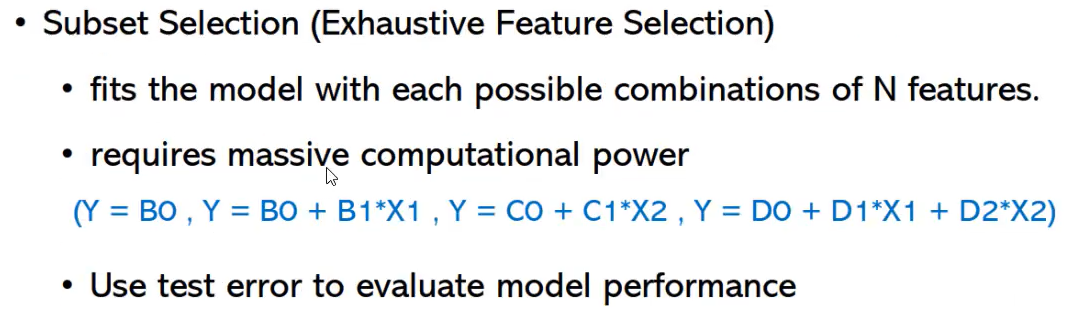

In [66]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS

#### Take toooooooo much time : 6mins

In [96]:
import time

In [98]:
%%time
efs = EFS(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1),
         min_features= 3,
         max_features= 7,
         scoring='accuracy',
         cv=None,
         n_jobs=-1,
         ).fit(X_train,y_train)

Features: 5720/5720

Wall time: 5min 52s


In [99]:
efs.best_score_

1.0

In [100]:
efs.best_idx_

(0, 1, 2)

In [101]:
efs.best_feature_names_

('Alcohol', 'Malic.acid', 'Ash')

In [102]:
efs.best_idx_

(0, 1, 2)

In [103]:
efs.get_params()

{'clone_estimator': True,
 'cv': None,
 'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'sqrt',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': -1,
 'estimator__oob_score': False,
 'estimator__random_state': 0,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(n_jobs=-1, random_state=0),
 'max_features': 7,
 'min_features': 3,
 'n_jobs': -1,
 'pre_dispatch': '2*n_jobs',
 'print_progress': True,
 'scoring': 'accuracy'}

In [73]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

C:\Users\mohit.kumar\Anaconda3\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\mohit.kumar\Anaconda3\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:xlabel='Number of Features', ylabel='Performance'>)

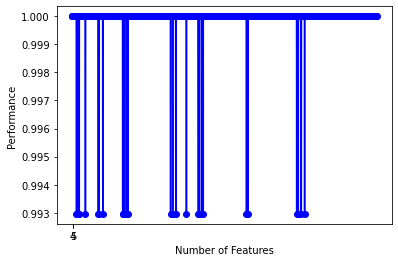

In [74]:
plot_sfs(efs.get_metric_dict(), kind='std_dev')

____
____
____

### 4. Recursive Feature Elimination (RFE) by Using Random Forest and Gradient Boosting Algorithm

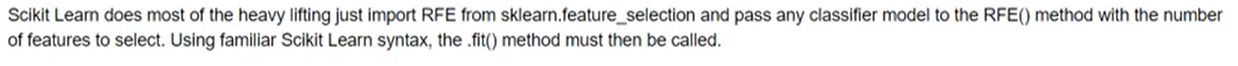

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score

In [106]:
from sklearn.datasets import load_breast_cancer

In [107]:
data = load_breast_cancer()

In [108]:
data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [109]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [110]:
X = pd.DataFrame(data = data.data, columns=data.feature_names)
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [111]:
y = data.target

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((455, 30), (114, 30), (455,), (114,))

### feature selection by Feature Importance of RandomForest classifier

In [113]:
sel = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1))
sel.fit(X_train,y_train)

SelectFromModel(estimator=RandomForestClassifier(n_jobs=-1, random_state=0))

In [115]:
sel.get_support()

# true values are the selected columns

array([ True, False,  True,  True, False, False,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True, False,  True,  True, False, False, False,
        True, False, False])

In [116]:
len(sel.get_support())

30

In [117]:
X_train.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [118]:
features = X_train.columns[sel.get_support()]

In [119]:
features

Index(['mean radius', 'mean perimeter', 'mean area', 'mean concavity',
       'mean concave points', 'area error', 'worst radius', 'worst perimeter',
       'worst area', 'worst concave points'],
      dtype='object')

In [120]:
len(features)

10

In [121]:
np.mean(sel.estimator_.feature_importances_)

0.03333333333333334

In [123]:
sel.estimator_.feature_importances_

# we can check which features have value greater than mean

array([0.03699612, 0.01561296, 0.06016409, 0.0371452 , 0.0063401 ,
       0.00965994, 0.0798662 , 0.08669071, 0.00474992, 0.00417092,
       0.02407355, 0.00548033, 0.01254423, 0.03880038, 0.00379521,
       0.00435162, 0.00452503, 0.00556905, 0.00610635, 0.00528878,
       0.09556258, 0.01859305, 0.17205401, 0.05065305, 0.00943096,
       0.01565491, 0.02443166, 0.14202709, 0.00964898, 0.01001304])

In [124]:
X_train_rfc = sel.transform(X_train)
X_test_rfc = sel.transform(X_test)

In [125]:
def run_randomForest(X_train, X_test, y_train, y_test):
    clf = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy of the dataset: ", accuracy_score(y_test, y_pred))

In [126]:
%%time
run_randomForest(X_train_rfc, X_test_rfc, y_train, y_test)

Accuracy of the dataset:  0.9473684210526315
Wall time: 184 ms


In [127]:
%%time
run_randomForest(X_train, X_test, y_train, y_test)

Accuracy of the dataset:  0.9649122807017544
Wall time: 180 ms


### Recursive feature Elimination (RFE)

In [128]:
from sklearn.feature_selection import RFE

In [129]:
sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1),
         n_features_to_select = 15)

sel.fit(X_train, y_train)

RFE(estimator=RandomForestClassifier(n_jobs=-1, random_state=0),
    n_features_to_select=15)

In [136]:
sel.get_params()

{'estimator__bootstrap': True,
 'estimator__ccp_alpha': 0.0,
 'estimator__class_weight': None,
 'estimator__criterion': 'gini',
 'estimator__max_depth': None,
 'estimator__max_features': 'sqrt',
 'estimator__max_leaf_nodes': None,
 'estimator__max_samples': None,
 'estimator__min_impurity_decrease': 0.0,
 'estimator__min_samples_leaf': 1,
 'estimator__min_samples_split': 2,
 'estimator__min_weight_fraction_leaf': 0.0,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': -1,
 'estimator__oob_score': False,
 'estimator__random_state': 0,
 'estimator__verbose': 0,
 'estimator__warm_start': False,
 'estimator': RandomForestClassifier(n_jobs=-1, random_state=0),
 'importance_getter': 'auto',
 'n_features_to_select': 15,
 'step': 1,
 'verbose': 0}

In [134]:
sel.get_support()

array([ True,  True,  True,  True, False, False,  True,  True, False,
       False, False, False, False,  True, False, False, False, False,
       False, False,  True,  True,  True,  True,  True, False,  True,
        True,  True, False])

In [137]:
sel.get_feature_names_out()

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean concavity', 'mean concave points', 'area error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst concavity', 'worst concave points',
       'worst symmetry'], dtype=object)

In [150]:
len(sel.get_feature_names_out())

15

In [145]:
X_train_RFE = sel.transform(X_train)
X_test_RFE = sel.transform(X_test)

In [146]:
%%time
run_randomForest(X_train_RFE, X_test_RFE, y_train, y_test)

Accuracy of the dataset:  0.9736842105263158
Wall time: 183 ms


### Feature Selection by Gradient Boost Algorithm

In [151]:
from sklearn.ensemble import GradientBoostingClassifier

In [152]:
sel = RFE(GradientBoostingClassifier(n_estimators=100, random_state=0), n_features_to_select= 12)
sel.fit(X_train,y_train)

RFE(estimator=GradientBoostingClassifier(random_state=0),
    n_features_to_select=12)

In [153]:
sel.get_support()

array([False,  True, False, False,  True, False, False,  True,  True,
       False, False, False, False,  True, False, False,  True, False,
       False, False,  True,  True,  True,  True, False, False,  True,
        True, False, False])

In [158]:
sel.get_feature_names_out()

array(['mean texture', 'mean smoothness', 'mean concave points',
       'mean symmetry', 'area error', 'concavity error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area',
       'worst concavity', 'worst concave points'], dtype=object)

In [157]:
len(sel.get_feature_names_out())

12

In [159]:
X_train_GB = sel.transform(X_train)
X_test_GB = sel.transform(X_test)

In [160]:
%%time
run_randomForest(X_train_GB, X_test_GB, y_train, y_test)

Accuracy of the dataset:  0.9736842105263158
Wall time: 189 ms


#### Will take toooooooooooooooooooo much time

#### loop to get best n_features_to_select for Gradient Boosting

In [171]:
for index in range(1, len(X_train.columns)+1):
    sel = RFE(GradientBoostingClassifier(n_estimators=100, random_state=0), n_features_to_select= index)
    sel.fit(X_train,y_train)
    X_train_GB = sel.transform(X_train)
    X_test_GB = sel.transform(X_test)
    print('Selected Feature: ', index, sel.get_feature_names_out())
    run_randomForest(X_train_GB, X_test_GB, y_train, y_test)
    print()

Selected Feature:  1 ['worst concave points']
Accuracy of the dataset:  0.8771929824561403

Selected Feature:  2 ['mean concave points' 'worst concave points']
Accuracy of the dataset:  0.9035087719298246

Selected Feature:  3 ['mean concave points' 'worst area' 'worst concave points']
Accuracy of the dataset:  0.9649122807017544

Selected Feature:  4 ['mean concave points' 'worst texture' 'worst area' 'worst concave points']
Accuracy of the dataset:  0.9736842105263158

Selected Feature:  5 ['mean concave points' 'worst texture' 'worst perimeter' 'worst area'
 'worst concave points']
Accuracy of the dataset:  0.9649122807017544

Selected Feature:  6 ['mean concave points' 'area error' 'worst texture' 'worst perimeter'
 'worst area' 'worst concave points']
Accuracy of the dataset:  0.9912280701754386

Selected Feature:  7 ['mean concave points' 'area error' 'worst texture' 'worst perimeter'
 'worst area' 'worst concavity' 'worst concave points']
Accuracy of the dataset:  0.973684210526

Selected Feature:  28 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'radius error' 'texture error'
 'perimeter error' 'area error' 'smoothness error' 'compactness error'
 'concavity error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Accuracy of the dataset:  0.9649122807017544

Selected Feature:  29 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'radius error' 'texture error'
 'perimeter error' 'area error' 'smoothness error' 'compactness error'
 'concavity error' 'concave points error' 'symmetry error'
 'fractal dimension error' 'worst radius' 'worst texture'
 'worst perimeter' 'worst area' 

In [172]:
# with 6 feature we are getting 99% accuracy
sel = RFE(GradientBoostingClassifier(n_estimators=100, random_state=0), n_features_to_select=6)
sel.fit(X_train,y_train)
X_train_GB = sel.transform(X_train)
X_test_GB = sel.transform(X_test)
print('Selected Feature: ',  sel.get_feature_names_out())
run_randomForest(X_train_GB, X_test_GB, y_train, y_test)
print()

Selected Feature:  ['mean concave points' 'area error' 'worst texture' 'worst perimeter'
 'worst area' 'worst concave points']
Accuracy of the dataset:  0.9912280701754386



#### loop to get best n_features_to_select for randomForest

In [169]:
for index in range(1, len(X_train.columns)+1):
    sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0,n_jobs=-1), n_features_to_select= index)
    sel.fit(X_train,y_train)
    X_train_rf = sel.transform(X_train)
    X_test_rf = sel.transform(X_test)
    print('Selected Feature: ', index, sel.get_feature_names_out())
    run_randomForest(X_train_rf, X_test_rf , y_train, y_test)
    print()

Selected Feature:  1 ['worst perimeter']
Accuracy of the dataset:  0.8947368421052632

Selected Feature:  2 ['mean concave points' 'worst perimeter']
Accuracy of the dataset:  0.9298245614035088

Selected Feature:  3 ['mean concave points' 'worst perimeter' 'worst concave points']
Accuracy of the dataset:  0.9473684210526315

Selected Feature:  4 ['mean concave points' 'worst perimeter' 'worst area'
 'worst concave points']
Accuracy of the dataset:  0.9649122807017544

Selected Feature:  5 ['mean concave points' 'worst radius' 'worst perimeter' 'worst area'
 'worst concave points']
Accuracy of the dataset:  0.9649122807017544

Selected Feature:  6 ['mean concavity' 'mean concave points' 'worst radius' 'worst perimeter'
 'worst area' 'worst concave points']
Accuracy of the dataset:  0.956140350877193

Selected Feature:  7 ['mean area' 'mean concavity' 'mean concave points' 'worst radius'
 'worst perimeter' 'worst area' 'worst concave points']
Accuracy of the dataset:  0.956140350877193


Selected Feature:  28 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'radius error' 'texture error'
 'perimeter error' 'area error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Accuracy of the dataset:  0.9649122807017544

Selected Feature:  29 ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'compactness error' 'concavity error' 'concave points error'
 'symmetry error' 'fractal dimension error' 'worst radius' 'worst texture'
 'worst perimeter' 'wo

In [173]:
# with 6 feature we are getting 98% accuracy
sel = RFE(RandomForestClassifier(n_estimators=100, random_state=0,n_jobs=-1), n_features_to_select= 17 )
sel.fit(X_train,y_train)
X_train_rf = sel.transform(X_train)
X_test_rf = sel.transform(X_test)
print('Selected Feature: ',sel.get_feature_names_out())
run_randomForest(X_train_rf, X_test_rf , y_train, y_test)
print()

Selected Feature:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean concavity' 'mean concave points' 'radius error' 'area error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry']
Accuracy of the dataset:  0.9824561403508771

